# Das Kochrezept der Prämienkalkulation

**Hinweise**

Diese interaktive Case Study wurde mittels eines Jupyter Notebooks erstell. Dies bedeutet, dass man in entsprechenden Code-Zellen interaktiv programmieren und Daten auswerten kann. Die Programmiersprache, in der alles umgesetzt ist, ist Python. Aber keine Sorge, Python-Kenntnisse werden zur Durchführung nicht benötigt.

*Wie sehen solche interaktiven Zellen konkret aus? Versuche in der unten stehende Zelle eine einfache Rechenoperation oder den Befehl `print("Hello world!")` einzugeben und drücke dann `Shift`+`Enter`.*

In [1]:
print("Hallo! Mein Name ist Max Mustermann.")

2*6

Hallo! Mein Name ist Max Mustermann.


12

*Um die Case Study zu beginnen, müssen noch ein paar Pakete und Hilfsfunktionen geladen werden. Dazu muss der untenstehende (eingeklappte) Code-Block ebenfalls mit  `Shift`+`Enter` ausgeführt werden.*

In [2]:
##Hilfscode

#Notwendige Python Pakete laden
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import scipy.interpolate as interpolate 

#Funktion für die Trendbestimmung
def Trendbestimmung(Jahre, Quoten):
    #Linearer Fit des Quotenverlaufs
    Steigung, y0 = np.polyfit(Jahre, Quoten, 1)
    
    #der Trend ergibt sich als der 2-jährige linear-extrapolierte Wert der Quote geteilt durch die "extrapolierte" Quote des aktuellen Jahres
    Trend = (Steigung*(Jahre[-1]+2)+y0)/(Steigung*(Jahre[-1])+y0)
    
    #es wird der Trend zuückgegeben
    return Trend

#Selbe Funltion wie oben nur dass hier auch die Fitparameter zurück gegeben werden.
def Trendbestimmung_params(Jahre, Quoten):
    #Linearer Fit des Quotenverlaufs
    Steigung, y0 = np.polyfit(Jahre, Quoten, 1)
    
    #der Trend ergibt sich als der 2-jährige linear-extrapolierte Wert der Quote geteilt durch die Quote des aktuellen Jahres
    Trend = (Steigung*(Jahre[-1]+2)+y0)/(Steigung*(Jahre[-1])+y0)
    
    #es wird der Trend zuückgegeben
    return np.array([Trend,Steigung,y0])

#Vektor mit den verschiedenen Altern für Erwachsene im Rechenbeispiel
Alter_Storno_Sterblichkeit = np.array([ 20.,  21.,  22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,
        31.,  32.,  33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,
        42.,  43.,  44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,
        53.,  54.,  55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,
        64.,  65.,  66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,
        75.,  76.,  77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,
        86.,  87.,  88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,
        97.,  98.,  99., 100., 101., 102.])

#Vektor mit Sterbewahrscheinlichkeiten. Daten leicht modifizert von der BaFin Tafel übernommen.
Sterblichkeit = np.array([0.000353, 0.000382, 0.000402, 0.000414, 0.000398, 0.00038 ,
       0.000359, 0.000333, 0.000311, 0.000296, 0.000288, 0.000286,
       0.00029 , 0.000293, 0.000303, 0.000318, 0.00033 , 0.000348,
       0.000373, 0.000404, 0.000441, 0.000485, 0.000536, 0.000592,
       0.00065 , 0.00072 , 0.000805, 0.000909, 0.001035, 0.001185,
       0.001357, 0.001549, 0.001759, 0.001987, 0.002236, 0.002511,
       0.00282 , 0.003166, 0.003552, 0.003917, 0.004234, 0.004616,
       0.005023, 0.005416, 0.005877, 0.006425, 0.007037, 0.007701,
       0.008431, 0.009197, 0.010079, 0.011107, 0.012282, 0.013674,
       0.015323, 0.017251, 0.019457, 0.021933, 0.024876, 0.028366,
       0.032485, 0.037317, 0.043424, 0.050319, 0.058294, 0.067455,
       0.0779  , 0.089719, 0.102992, 0.117777, 0.134092, 0.151906,
       0.170997, 0.191134, 0.211354, 0.232032, 0.24325 , 0.25129 ,
       0.25896 , 0.26621 , 0.27302 , 0.27934 , 1 ])

#Vektor mit Stornowahrscheinlichkeiten. Daten leicht modifizert von der BaFin Tafel übernommen.
Storno = np.array([1.28111091e-01, 1.28111091e-01, 1.28111091e-01, 1.28111091e-01,
       9.93580300e-02, 8.51955870e-02, 8.61750460e-02, 9.70122360e-02,
       1.07571532e-01, 1.07907263e-01, 9.80066410e-02, 8.40200430e-02,
       6.95391040e-02, 6.39885510e-02, 5.86108590e-02, 5.35903320e-02,
       4.90001320e-02, 4.48737550e-02, 4.12208420e-02, 3.80252920e-02,
       3.52471220e-02, 3.28368450e-02, 3.07502480e-02, 2.89566110e-02,
       2.74277480e-02, 2.61452860e-02, 2.50998440e-02, 2.42975060e-02,
       2.37401940e-02, 2.34296010e-02, 2.33562470e-02, 2.34758770e-02,
       2.34758770e-02, 2.34758770e-02, 2.34758770e-02, 2.31063930e-02,
       2.17317750e-02, 1.94855570e-02, 1.66586140e-02, 1.38157360e-02,
       1.13008800e-02, 9.26357600e-03, 7.72579200e-03, 6.63135900e-03,
       5.88889800e-03, 5.38323500e-03, 5.00148800e-03, 4.66391000e-03,
       4.32413200e-03, 3.99103100e-03, 3.68120200e-03, 3.40814000e-03,
       3.17674700e-03, 2.98994500e-03, 2.84530500e-03, 2.51440800e-03,
       2.22851900e-03, 1.97260000e-03, 1.74301100e-03, 1.53635300e-03,
       1.34955300e-03, 1.17987600e-03, 1.02480700e-03, 8.82100000e-04,
       7.49773000e-04, 6.26024000e-04, 5.09284000e-04, 3.98195000e-04,
       2.91582000e-04, 1.88499000e-04, 8.81500000e-05, 8.81500000e-05,
       8.81500000e-05, 8.81500000e-05, 8.81500000e-05, 8.81500000e-05,
       8.81500000e-05, 8.81500000e-05, 8.81500000e-05, 8.81500000e-05,
       8.81500000e-05, 8.81500000e-05, 8.81500000e-05])

#Funktion zur Berechnung der rechnungsmäßig Lebenden
def Berechne_ly(l_20, StornoPlusSterblichkeit):
    l_y = np.array([l_20])
    for i in range(20,102):
        l_y = np.append(l_y,round(l_y[-1]*(1-StornoPlusSterblichkeit[i-20])))

    return l_y

#Vektor mit Kopfschäden
Kopfschaeden = np.array([  352.8593,   388.2635,   373.6262,   396.7469,   374.8589,
         439.851 ,   489.2027,   669.6451,   729.8146,   943.0601,
        1183.7806,  1426.9665,  1597.4715,  1713.0305,  1813.6269,
        1832.4329])
Alter_Kopfschaeden = np.arange(0,16)*5+22.5

#Funktion zum glätten von Daten
def savitzky_golay(y, window_size, order, deriv=0, rate=1):
    
    from math import factorial
    
    order_range = range(order+1)
    half_window = (window_size -1) // 2

    b = np.mat([[k**i for i in order_range] for k in range(-half_window, half_window+1)])
    m = np.linalg.pinv(b).A[deriv] * rate**deriv * factorial(deriv)
    
    firstvals = y[0] - np.abs( y[1:half_window+1][::-1] - y[0] )
    lastvals = y[-1] + np.abs(y[-half_window-1:-1][::-1] - y[-1])
    y = np.concatenate((firstvals, y, lastvals))
    return np.convolve( m[::-1], y, mode='valid')

#Funtkion die mittels obigen Glättungsalgorithmus die Kopfschadenkurve berechnet
def Kopfschaden_Fit(Tatsaechliche_Kopfschaeden):
    
    y_smoothed = savitzky_golay(Tatsaechliche_Kopfschaeden,13,5)

    xp = np.linspace(22.5,97.5,len(y_smoothed))
    xp = np.insert(xp,0,20)
    xp = np.append(xp,102)

    y_smoothed = np.insert(y_smoothed,0,y_smoothed[0])
    y_smoothed = np.append(y_smoothed,y_smoothed[-1])
    
    x_ret= np.arange(20,103)
    
    y_ret = np.interp(x_ret, xp, y_smoothed)
    return x_ret, y_ret

#Funktion zum Berechnen eines Vektors mit (1+zins)^(-i) im i-ten Eintrag.
def Diskontvektor(i):
    
    v = np.zeros(83)
    for j in range(0,102-19):
        v[j] = (1+i)**(-j)
    return v

#Funktion die die erwarteten Einnahmen (pro Euro Prämie) berechnet
def Erwartete_Einnahmen_per_Prämie(Alter,Zins,RechnungsmaessigVersicherte):
    
    v = Diskontvektor(Zins)
    
    return np.sum(v[:(103-Alter)]*RechnungsmaessigVersicherte[(Alter-20):])

#Funktion die die erwateten Schadenaufwendungen berechnet
def Erwartete_Leistungen(Alter,Zins,RechnungsmaessigVersicherte,Kopfschaden_Kurve):
    
    v = Diskontvektor(Zins)
    
    Produkt = RechnungsmaessigVersicherte*Kopfschaden_Kurve
    
    return np.sum(Produkt[(Alter-20):]*v[:(103-Alter)])

#Input für die Quoten aus Teil 1.3
Jahre_Quoten=np.array([2018,2019,2020])
Quoten_Tarif_A = np.array([0.9473,0.9312 ,0.8972])
Quoten_Tarif_B = np.array([0.9689, 0.9890,1.0149])
Quoten_Tarif_C = np.array([1.0011, 0.9735,0.9997])

print("Hilfscode erfolgreich ausgeführt! Du kannst jetzt loslegen.")

Hilfscode erfolgreich ausgeführt! Du kannst jetzt loslegen.


In den Kapiteln führen wir dich durch deine ersten Kochversuche!

## Das Rezept: Wie wird die Prämie bestimmt

Bevor wir uns Gedanken über einen fairen Preis für ein Versicherungspordukt machen, betrachten wir zunächst die damit verbundenen erwarteten Ausgaben und Einnahmen.

### Erwartete Einnahmen:

Wir wollen die Prämie so bestimmen, dass sie über die gesamte Versicherungsdauer konstant den Wert $P_x$ besitzt. Hierbe bezeichnet $x$ das Eintrittsalter des Versicherten. Der heutige Wert der Prämieneinnahmen ergibt sich dann aus der Summe aller künftigen Einnahmen. Hierbei muss allerdings berücksichtigt werden, dass (a) über die Jahre Versicherte durch Storno und Tod aus der Versicherung ausscheiden und (b) der heutige Wert einer künftigen Einnhame entsprechend diskonitert ("abgezinst") werden muss. Wir gehen an dieser Stelle davon aus, dass zum Einen ein fester Zinssatz von $i$ erwirtschaftet wird und zum Anderen im Alter $y$ noch $l_y$ Personen versichert sind. Wie man genau $l_y$ bestimmt erklären wir später. Das maximale Alter, mit dem wir rechnen, soll mit $\omega$ bezeichnet werden. Damit erhalten wir dann:

<center>$\mathrm{Wert\ der\ Prämieneinnahmen} =: l_x P_x + l_{x+1}\cdot P_x\cdot(1+i)^{-1}+ l_{x+2}\cdot P_x\cdot(1+i)^{-2} + \dots + l_{\omega}\cdot P_x\cdot(1+i)^{-\omega+x} $

### Erwarteten Versicherungsleistungen:

Ähnliche Überlegungen können wir jetzt auch für die erwarteten Versicherungsleistungen anstellen. An der Stelle nehmen wir an, wir wissen den Wert der Versicherungsleistungen (Schaden), den eine $y$-jährige Person verursacht und bezeichnen die Größe mit $K_y$. Auch hier erklären wir weiter unten, wie wir diese Größe bestimmen. Analog zu oben ergibt sich dann:

<center>$\mathrm{Wert\ der\ Versicherungsleistungen} =: l_x K_x + l_{x+1}\cdot K_{x+1}\cdot(1+i)^{-1}+ l_{x+2}\cdot K_{x+2}\cdot(1+i)^{-2} + \dots + l_{\omega}\cdot K_{\omega}\cdot(1+i)^{-\omega+x} $

### Äquivalenzprinzip:

Wie ergibt sich nun die gesuchte faire Prämie für unser Versicherungsprodukt? Dafür muss der Wert der erwarteten Versicherungsleistungen dem Wert der erwarteten Einnahmen gerade entsprechen. Damit erhalten wir:


<center>$\boxed{P_x =: \frac{l_x K_x + l_{x+1}\cdot K_{x+1}\cdot(1+i)^{-1}+ l_{x+2}\cdot K_{x+2}\cdot(1+i)^{-2} + \dots + l_{\omega}\cdot K_{\omega}\cdot(1+i)^{-\omega+x}}{l_x + l_{x+1}\cdot(1+i)^{-1}+ l_{x+2}\cdot(1+i)^{-2} + \dots + l_{\omega}\cdot (1+i)^{-\omega+x}}} $

## Der erste Versuch: Prämienkalkulation an einem Beispiel

Schauen wir uns jetzt ein konkretes Beispiel an. Um die obenstehende Formel anwenden zu können benötigen wir die Werte für $l_y$ und $K_y$. 

Wir starten erst mit der Bestimmung von $l_y$, der Anzahl an versicherten Personen mit Alter $y$. In der Krankenversicherung können Versicherte aufgrund zweier Ursachen aus der Versicherung ausscheiden: Durch Stornieren des Vertrages oder oder durch Tod. Die altersabhängigen Wahrscheinlichkeiten für beide Ereignisse werden z.B. von der [BaFin](https://www.bafin.de/DE/PublikationenDaten/Statistiken/statistiken_node.html) veröffentlicht und sind hier bereits in zwei Variablen `Storno`und `Sterblichkeit` in Vektorform gespeichert. Die folgende Grafik illustriert beide Wahrscheinlichkeitsverläufe:


<IPython.core.display.Javascript object>


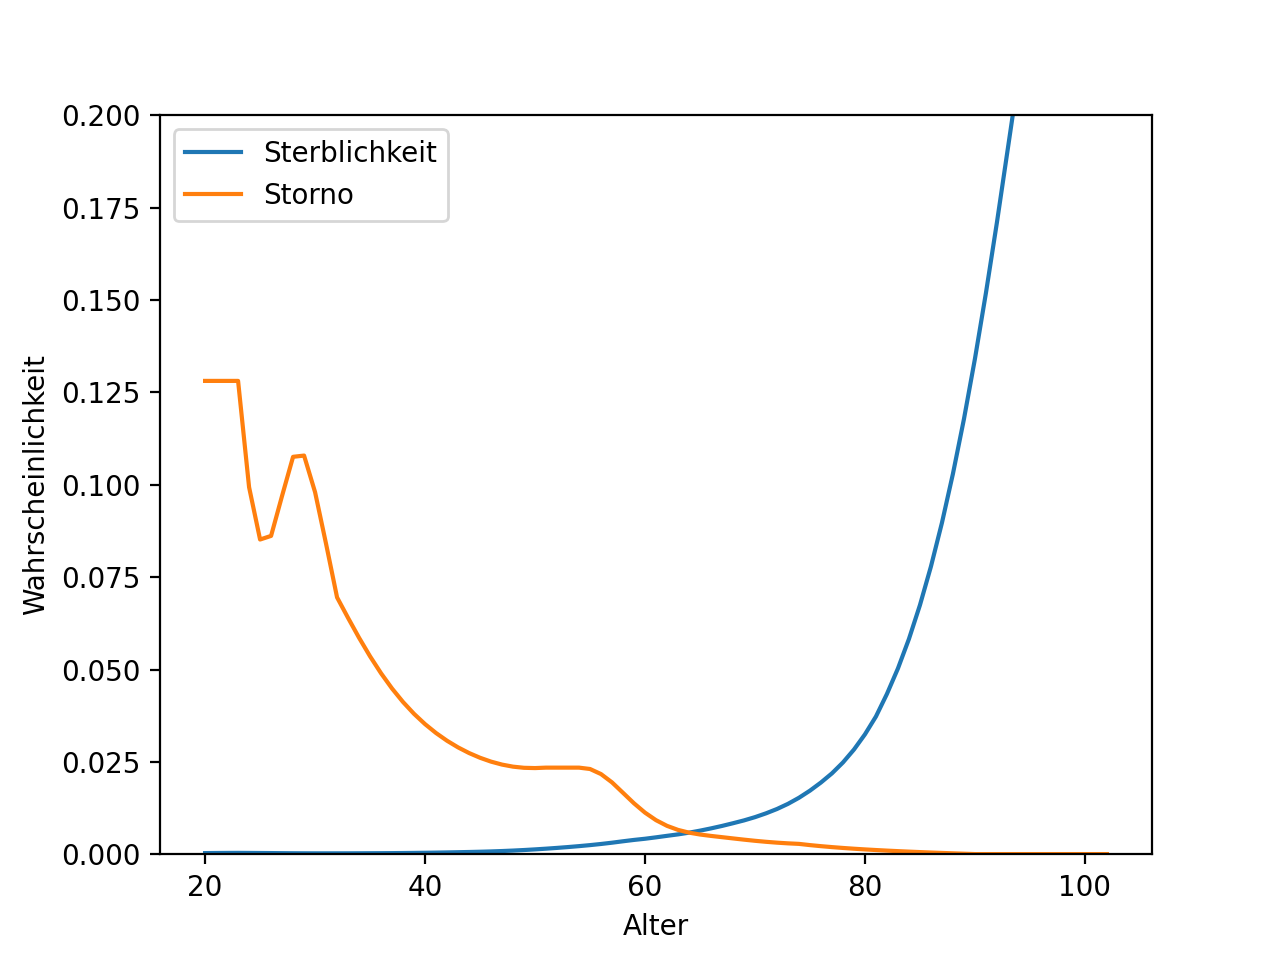

In [3]:
#Plotte Storno und Sterblichkeit
%matplotlib notebook
ax1 = plt.subplot(111)

ax1.plot(Alter_Storno_Sterblichkeit,Sterblichkeit,label="Sterblichkeit")
ax1.plot(Alter_Storno_Sterblichkeit,Storno,label="Storno")

plt.ylabel("Wahrscheinlichkeit")
plt.xlabel("Alter")

plt.ylim([0,0.2])
ax1.legend(loc="upper left")
plt.show()

Berechne nun die gesamte Wahrscheinlichkeit durch einfache Summation der beiden Variablen:

In [4]:
StornoPlusSterblichkeit = Storno + Sterblichkeit#<----- Hier Code einfügen

Werte aus diesem neuen Vektor lassen sich mit `print(StornoPlusSterblichkeit[i])` wobei $i=0$ dem Alter 20 entspricht, $i=1$ dem Alter 21, etc.. *Lass dir als Beispiel die gesamte Storno- und Sterbewahrscheinlichkeit für das Alter 24 ausgeben, in dem du die untenstehende Code-Zelle modifizierst und ausführst:*

In [5]:
print(StornoPlusSterblichkeit[4])#<----- Hier Code einfügen

0.09975603


*Wie viele rechnungsmäßig Versicherte gibt es mit Alter 25, wenn man mit 100000 Versicherte mit Alter 20 startet? Warum spielt der Startwert von 100000 für die Prämienkalkulaiton eigentlich keine Rolle?**

|Alter|20|21|22|23|24|25|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|Versicherte|100000|87154|75955|66194|57686|?|


In [6]:
round(57686*(1-StornoPlusSterblichkeit[4]))#<----- Hier Code einfügen

51931.0

Basierend auf dieser Wahrscheinlichkeit berechnen wir jetzt die rechnungsmäßig Versicherten für alle Alter zwischen 20 und 102. Dafür haben wir bereits eine Hilfsfunktion geschrieben, die diese Rechnung durchführt: `Berechne_ly(l_20, StornoPlusSterblichkeit)` die den Schritt oben für dich iteriert und damit die gesamte Reihe $l_y$ berechnet. Als Argumente muss man dafür die Anzahl der Versicherten mit Alter 20 ($l_{20}$) aus der Tabelle oben übergeben und die Variable `StornoPlusSterblichkeit`. *Vervollständige den Code und führe ihn aus. Stimmen die Ergebnisse mit der Tabelle oben für die Alter 20 bis 25 überein?*

In [7]:
RechnungsmaessigVersicherte = Berechne_ly(100000,StornoPlusSterblichkeit) #<----- Hier Code einfügen

print(RechnungsmaessigVersicherte)

[100000.  87154.  75955.  66194.  57686.  51931.  47487.  43378.  39155.
  34931.  31151.  28089.  25721.  23925.  22387.  21068.  19932.  18949.
  18092.  17339.  16673.  16078.  15542.  15056.  14611.  14201.  13819.
  13461.  13122.  12797.  12482.  12174.  11869.  11569.  11274.  10984.
  10703.  10440.  10204.   9998.   9821.   9668.   9534.   9412.   9299.
   9190.   9081.   8972.   8861.   8748.   8633.   8514.   8390.   8260.
   8122.   7974.   7816.   7647.   7464.   7265.   7048.   6810.   6548.
   6257.   5937.   5586.   5206.   4798.   4366.   3915.   3453.   2990.
   2536.   2102.   1700.   1341.   1030.    779.    583.    432.    317.
    230.    166.]


Grafisch sieht unser Ergebnis so aus:

<IPython.core.display.Javascript object>


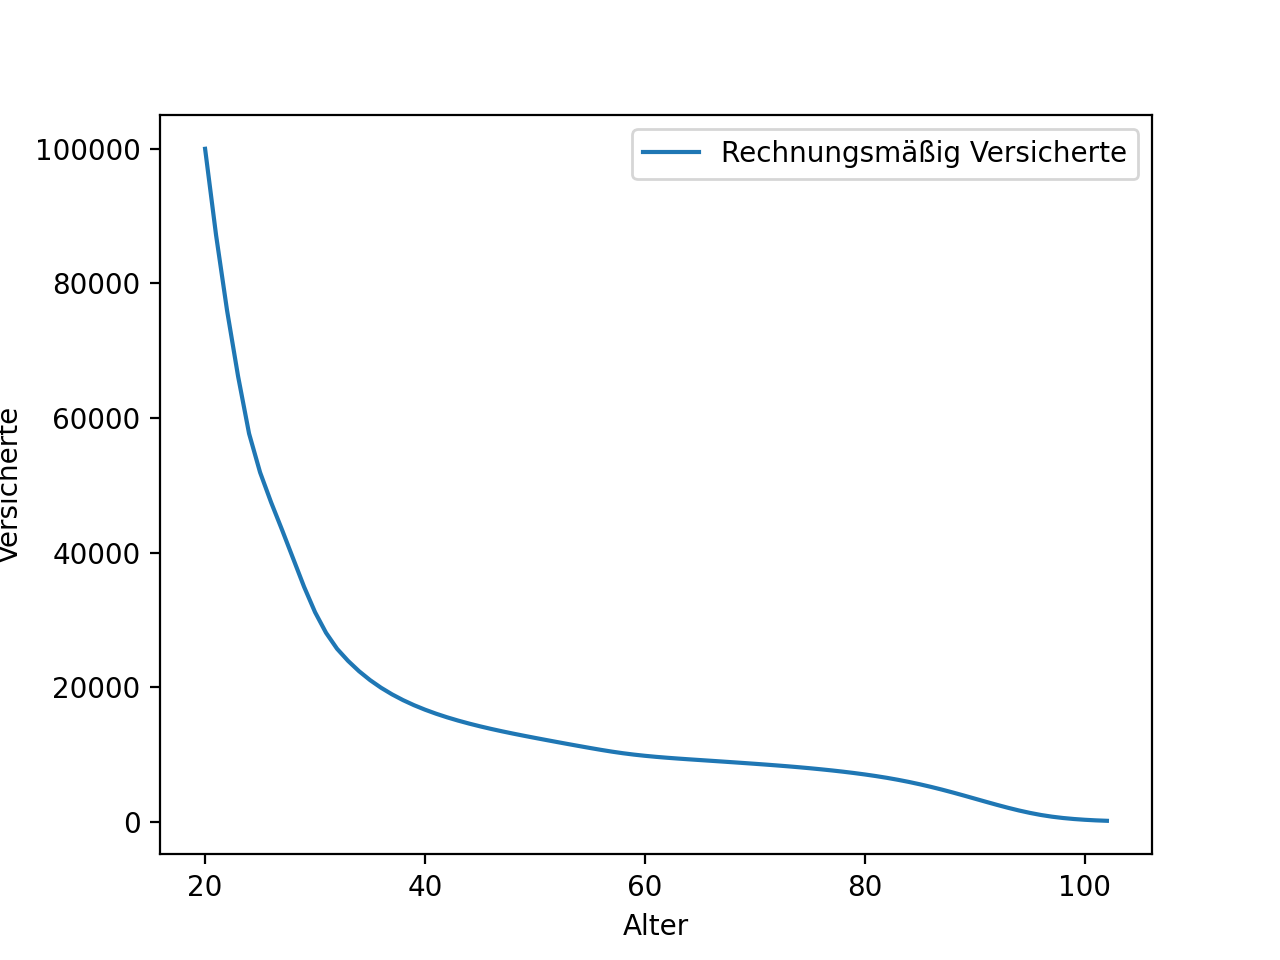

In [8]:
#Plotte Rechnungsmäßig Versicherte
%matplotlib notebook
ax2 = plt.subplot(111)

ax2.plot(Alter_Storno_Sterblichkeit,RechnungsmaessigVersicherte,label="Rechnungsmäßig Versicherte")
plt.ylabel("Versicherte")
plt.xlabel("Alter")
ax2.legend(loc="upper right")
plt.show()

Wir haben nun also $l_y$ bestimmt. Es fehlen aber noch konkrete Werte für $K_y$. Die Werte hierfür werden auf Basis der vom Versicherungsunternehmen tatsächlich beobachteten Schäden in verschiedenen Altersgruppen bestimmt. Nehmen wir an, folgende altersabhängigen Schäden wurden beobachtet:

<IPython.core.display.Javascript object>


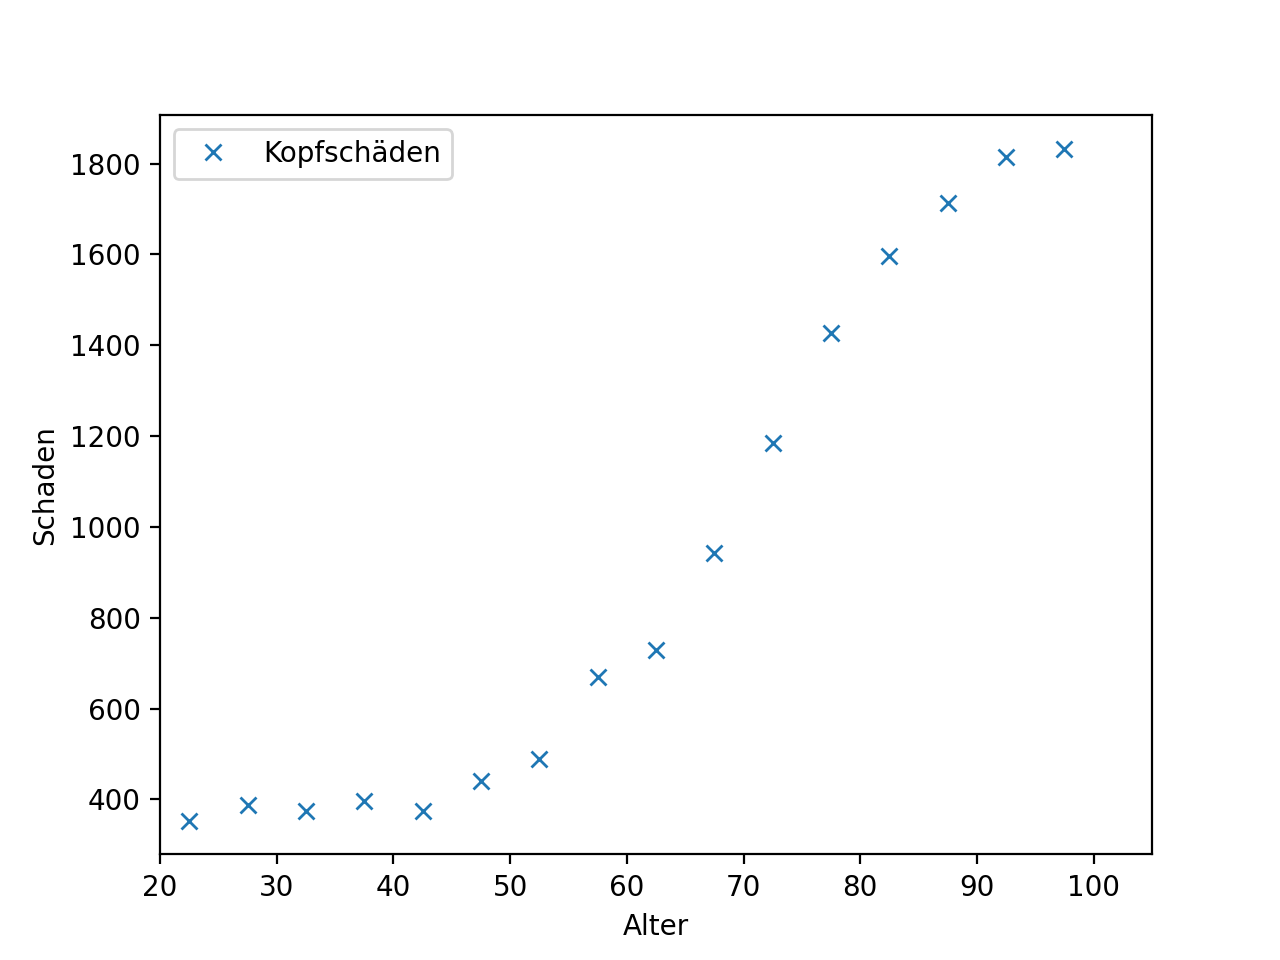

In [9]:
#Plotte Kopfschäden
%matplotlib notebook
ax3 = plt.subplot(111)

ax3.plot(Alter_Kopfschaeden,Kopfschaeden,'x',label="Kopfschäden")
plt.ylabel("Schaden")
plt.xlabel("Alter")
ax3.legend(loc="upper left")

plt.xlim(20,105)
plt.show()

Ziel ist es nun, eine glatte Kurve durch die beobachteten Kopfschäden zu legen. Auch dafür wurde bereits eine Funktion vordefiniert, die eine entsprechende Kurve findet: `Kopfschaden_Fit(Kopfschaeden)` übernimmt die tatsächlichen Kopfschäden, gespeichert in `Kopfschaeden` und legt eine Kurve durch. In der Ausgabe stehen die geglätteten Schadenswerte:

In [10]:
x_Werte, Kopfschaden_Kurve = Kopfschaden_Fit(Kopfschaeden)

print(Kopfschaden_Kurve)

[ 352.8593      352.8593      352.8593      354.368602    357.38720599
  360.40580998  363.42441397  366.44301796  368.30633331  369.01436002
  369.72238673  370.43041345  371.13844016  372.49572035  374.50225403
  376.5087877   378.51532137  380.52185505  383.66937959  387.95789501
  392.24641043  396.53492585  400.82344126  406.33158086  413.05934462
  419.78710839  426.51487216  433.24263593  443.12934003  456.17498446
  469.2206289   482.26627333  495.31191777  512.95153226  535.18511681
  557.41870136  579.65228591  601.88587046  628.87715285  660.6261331
  692.37511335  724.1240936   755.87307384  791.44948716  830.85333354
  870.25717993  909.66102631  949.06487269  990.24667208 1033.20642446
 1076.16617684 1119.12592922 1162.0856816  1205.57753372 1249.60148557
 1293.62543741 1337.64938926 1381.67334111 1421.8322065  1458.12598545
 1494.4197644  1530.71354334 1567.00732229 1598.85476107 1626.25585967
 1653.65695827 1681.05805687 1708.45915547 1729.1386792  1743.09662805
 1757.0

Und untenstehender Code illustriert das Ergebnis:

<IPython.core.display.Javascript object>


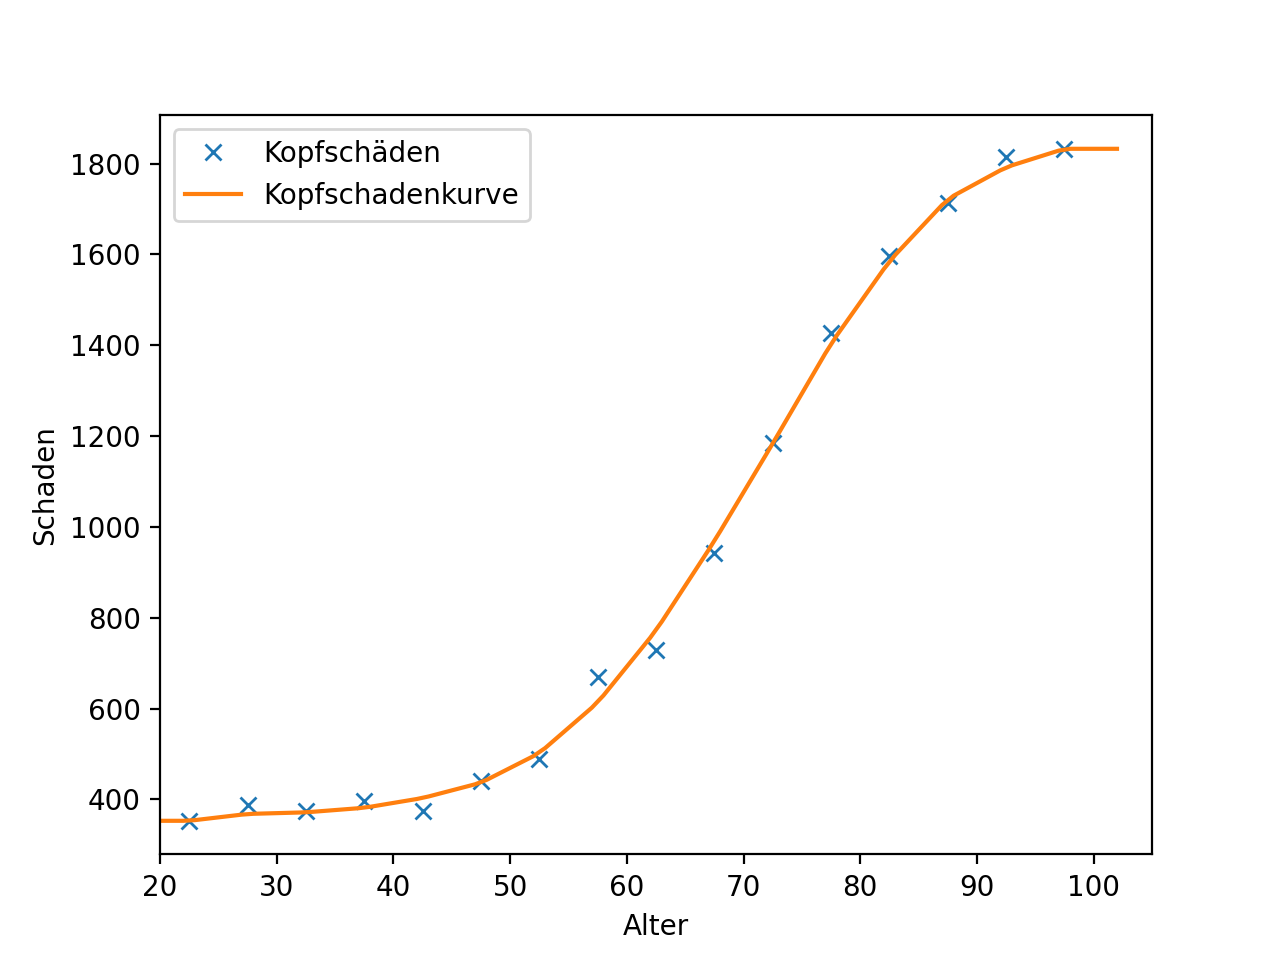

In [11]:
#Plotte Kopfschäden und Kurve
%matplotlib notebook
ax3 = plt.subplot(111)

ax3.plot(Alter_Kopfschaeden,Kopfschaeden,'x',label="Kopfschäden")
plt.ylabel("Schaden")
plt.xlabel("Alter")

ax3.plot(x_Werte, Kopfschaden_Kurve,label="Kopfschadenkurve")
ax3.legend(loc="upper left")

plt.xlim(20,105)
plt.show()

Jetzt sind alle Zutaten da, um den Wert der fairen Prämie mittels des Äquivalenzprinzips zu berechnen. Auch hier haben wir bereits Funktionen definiert, die sowohl den Zähler (erwartete Leistungen) als auch den Nenner (erwartete Einnahmen pro € Prämie) berechnen: `Erwartete_Einnahmen_per_Prämie(Alter,Zins,RechnungsmaessigVersicherte)` und `Erwartete_Leistungen(Zins,RechnungsmaessigVersicherte,Kopfschaden_Kurve)`. *Wende die Formeln an und berechne damit die Prämie für einen 20-jährigen bei einen Zinssatz von jeweils 1,0% , 1,5% und 2,5%.* Tipp: mit `round( XX , 2)` kannst du das Ergebnis auf zwei Nachkommastellen runden.

|Zinssatz|1,0%|1,5%|2,5%|
|:---:|:---:|:---:|:---:|
|Prämie|296,08€|?|?|

In [12]:
Zins = 0.015#<--- Hier Code einfügen
Leistungsbarwert = Erwartete_Leistungen(20,Zins,RechnungsmaessigVersicherte,Kopfschaden_Kurve)
Rentenbarwert = Erwartete_Einnahmen_per_Prämie(20,Zins,RechnungsmaessigVersicherte)

Praemie = round(Leistungsbarwert/Rentenbarwert,2)#<--- Hier Code einfügen
print(Praemie)

466.83


Die Prämie ist nun also erfolgreich bestimmt. Wie können wir das Ergebnis interpretieren? Dafür wurde der Wert der Prämie in den bereits bekannten Graph mit den Kopfschäden geplottet. Die Grafik ist interaktiv: Du kannst die Kopfschäden und rechnungsmäßig Versicherten verändern, in dem du die grünen Kreise verschiebst. *Wie verändert wich dadurch die Prämie?*

(Hinweis: Durch die interaktive Kurve weichen die hier verwendeten Kurve für rechnungsm. Versicherte und Kopfschäden geringfügig von den Werten oben ab. Dadurch weicht auch die Prämie leicht von der Berechnung oben ab.)

<IPython.core.display.Javascript object>


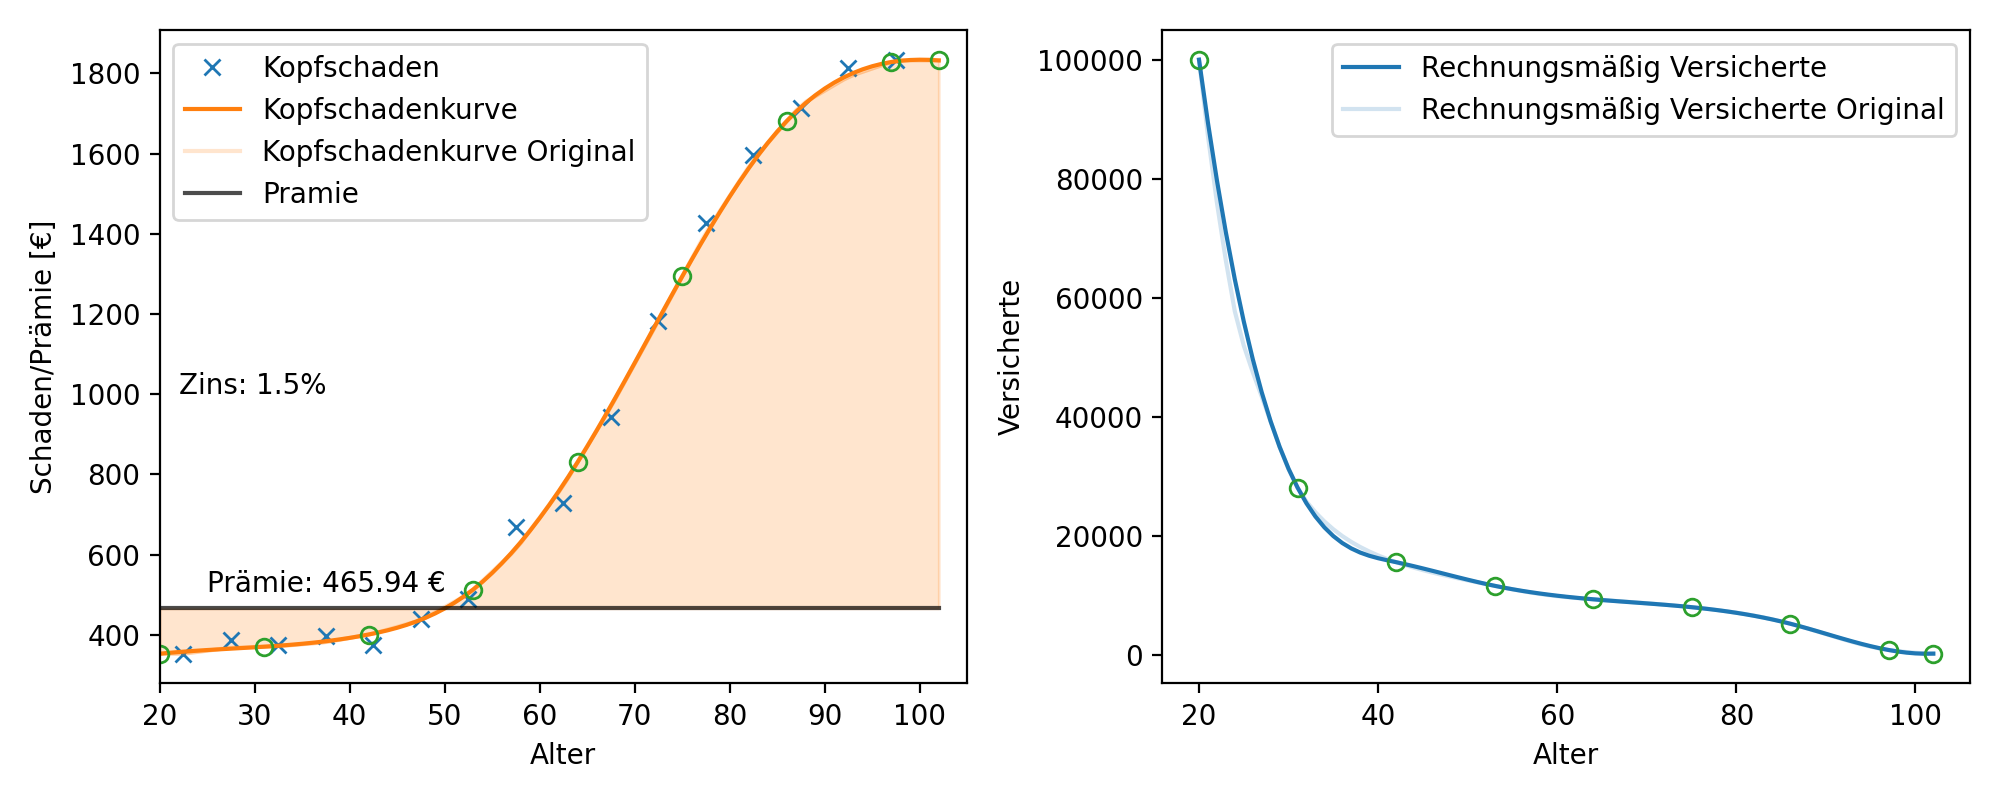

In [13]:
#Plotte Prämie und Kopfschäden
%matplotlib notebook
picked_object = -1
pind = -1

#Aktion die beim Klicken eines der Spline-Stützpunkte asugeführt wird
def button_press_callback(event):
    global pind
    global picked_object
    'whenever a mouse button is pressed'
    
    #### store clicked object #####
    picked_object = event.artist
    pind = event.ind  
    print(pind)

#Aktion beim Beenden des Klick-Events
def button_release_callback(event):
    global pind
    global picked_object
    global area
    global area_plotted
    global y_Praemie
    global praemie_line
     
     #Nur bei Linksklick aktionen durchführen
    if event.button != 1:
        return
        
    #Nur Aktionebn durchführen, wenn ein Stützpunkt angeklickt wurde
    if picked_object == knots or picked_object == knots_ppl: 
    
        pind = None
        picked_object = -1
        
        #Berechne die neue Prämie und plotte die Grafik erneut
        Leistungsbarwert = Erwartete_Leistungen(20,Zins,y_spline_Versicherte,y_spline)
        Rentenbarwert = Erwartete_Einnahmen_per_Prämie(20,Zins,y_spline_Versicherte)
        Praemie = round(Leistungsbarwert/Rentenbarwert,2)
        y_Praemie = np.ones(83)*Praemie
        praemie_line, = ax3.plot(x_Alter,y_Praemie,color='black',label="Pramie",alpha=0.7)

        area = ax3.fill_between(x_Alter,y_Praemie,y_spline,color=color_area,alpha=0.2)

        text.set_text('Prämie: '+ str(y_Praemie[0])+ ' €')
        text.set_position((25,y_Praemie[0]+40))
        
        area_plotted = 1
        
        fig.canvas.draw()
        
        
#Aktion bei Mausbewegung     
def motion_notify_callback(event):
    global pind
    global picked_object
    'on mouse movement'
    
    #Nur bei Mausbewegung im Plot und nur bei Linksklick Aktionen erforderlich
    if event.inaxes is None:
        return
    if event.button != 1:
        return
    
    #Untetrscheidung zwischen linken und rechtem Plot
    if picked_object == knots:
        
        increment = event.ydata - y_spline_knot[pind]
        
        move_single_point(increment,pind)
      
    if picked_object == knots_ppl:

        increment = event.ydata - y_spline_knot_ppl[pind]
        
        move_single_point(increment,pind)
        
#Funktion zum Verschieben eines Punktes
def move_single_point(increment,index):
    global area_plotted
    global picked_object
    
    if picked_object == knots:
        y_spline_knot[index] = y_spline_knot[index] + increment

        knots.set_ydata(y_spline_knot)

        update_spline_fit()
 
    if picked_object == knots_ppl:
        y_spline_knot_ppl[index] = y_spline_knot_ppl[index] + increment

        knots_ppl.set_ydata(y_spline_knot_ppl)

        update_spline_fit_ppl()
        
    #Während des Verschiebens wird die schraffierte Fläche und die Prämien-Linie gelöscht um etwas Rechenaufwand zu sparen
    
    if area_plotted == 1:
        area_plotted = 0
        area.remove()
        praemie_line.remove()
        
    fig.canvas.draw()

#Neue Spline Kurve im linken Plot berechnen
def update_spline_fit():
    
    global x_spline_knot
    global y_spline_knot
    global y_spline
    f2 = interpolate.interp1d(x_spline_knot, y_spline_knot, kind='cubic')
    y_spline = f2(x_Alter)
    
    spline_curve.set_ydata(y_spline)
    
#Neue Spline Kurve im rechten Plot berechnen   
def update_spline_fit_ppl():
    
    global x_spline_knot_ppl
    global y_spline_knot_ppl
    global y_spline_Versicherte
    f2 = interpolate.interp1d(x_spline_knot, y_spline_knot_ppl, kind='cubic')
    y_spline_Versicherte = f2(x_Alter)
    
    spline_curve_ppl.set_ydata(y_spline_Versicherte)

#Set Fig-Größe
fig = plt.figure(figsize=(10, 4))

#Erzeuge Plots
ax3 = fig.add_subplot(121)

#Aktionen "auswählbares Objekt anklicken", "Maustaste loslassen" und "Mausbewegung" werden mit obigen Fktnen. verknüpft
fig.canvas.callbacks.connect('pick_event', button_press_callback)
fig.canvas.callbacks.connect('button_release_event', button_release_callback)
fig.canvas.callbacks.connect('motion_notify_event', motion_notify_callback)
 
#Plotte Kopfschäden
ax3.plot(Alter_Kopfschaeden,Kopfschaeden,'x',label="Kopfschaden")

#Achsenbeschriftung
plt.ylabel("Schaden/Prämie [€]")
plt.xlabel("Alter")

#Plotte Kopfschadenkurve. Hier per Spline Fit.
x_Alter = np.linspace(20,102,83)

x_spline_knot = x_Werte[::11]
y_spline_knot = Kopfschaden_Kurve[::11]
x_spline_knot = np.append(x_spline_knot,x_Werte[-1])
y_spline_knot = np.append(y_spline_knot,Kopfschaden_Kurve[-1])

f2 = interpolate.interp1d(x_spline_knot, y_spline_knot, kind='cubic')
y_spline = f2(x_Alter)

spline_curve, = ax3.plot(x_Alter,y_spline,label='Kopfschadenkurve')

#Plotte Original Kopfschadenkurve
ax3.plot(x_Alter,Kopfschaden_Kurve,label='Kopfschadenkurve Original',alpha=0.2,color = spline_curve.get_color())
color_area=spline_curve.get_color()

#berechne rechnngsm. Versicherte per Interpolation um später die Grafik interaktiv zu machen
y_spline_knot_ppl = RechnungsmaessigVersicherte[::11]
y_spline_knot_ppl = np.append(y_spline_knot_ppl,RechnungsmaessigVersicherte[-1])

f2_ppl = interpolate.interp1d(x_spline_knot, y_spline_knot_ppl, kind='cubic')
y_spline_Versicherte = f2_ppl(x_Alter)

#Berechne die  zugehörige Prämie
Leistungsbarwert = Erwartete_Leistungen(20,Zins,y_spline_Versicherte,y_spline)
Rentenbarwert = Erwartete_Einnahmen_per_Prämie(20,Zins,y_spline_Versicherte)
Praemie = round(Leistungsbarwert/Rentenbarwert,2)
y_Praemie = np.ones(83)*Praemie

#Plotte Spline Stützpunkte und mache diese "anklickbar"
knots, = ax3.plot(x_spline_knot,y_spline_knot,marker='o',linestyle='none',fillstyle='none') 
knots.set_picker(True)
knots.set_pickradius(5)  

#schraffierter Bereich zwischen Prämie und Kopfschadenkurve
area = ax3.fill_between(x_Alter,y_Praemie,Kopfschaden_Kurve,color=color_area,alpha=0.2)
area_plotted = 1

#Prämie plotten
praemie_line, = ax3.plot(x_Alter,y_Praemie,color='black',label="Pramie",alpha=0.7)
text = ax3.text(25, y_Praemie[0]+40, 'Prämie: '+ str(y_Praemie[0]) + ' €', fontsize=10)
ax3.text(22, 1000, 'Zins: '+ str(Zins*100) + '%', fontsize=10)

#Plot-Limits
plt.xlim(20,105)

#Legende
ax3.legend(loc="upper left")

#Rechter Plot
ax4 = fig.add_subplot(122)

#Darstellung der Spline Kuirve für die rechnungsm. Versicherten
spline_curve_ppl, = ax4.plot(x_Alter,y_spline_Versicherte,label="Rechnungsmäßig Versicherte")

#Darstellung der Stützpunkte
knots_ppl, = ax4.plot(x_spline_knot,y_spline_knot_ppl,marker='o',linestyle='none',fillstyle='none',color=knots.get_color()) 
knots_ppl.set_picker(True)
knots_ppl.set_pickradius(5)         
                  
#Plotte ursprüngliche Kurve für rechnungsm. Versicherte
ax4.plot(Alter_Storno_Sterblichkeit,RechnungsmaessigVersicherte,label="Rechnungsmäßig Versicherte Original",color=spline_curve_ppl.get_color(),alpha=0.2)

#Berschriftung
plt.ylabel("Versicherte")
plt.xlabel("Alter")

#Legende
ax4.legend(loc="upper right")

#Auto-Anordnung und Abstand der Plots
fig.tight_layout()

#Anzeigen
plt.show()

*Wie verändert der Zinssatz die Höhe der schwarzen Line (Prämie)?* Wie man sieht, wirkt sich eine Absenkung des Zinssatzes (wie in den letzten Jahren beobachtet) sehr stark auf die Prämie aus. In diesem Kontext wird auch klar, warum PKV Unternehmen aktuell die Prämien immer wieder nach oben anpassen müssen, wie auch in der Presse jüngstens [zu lesen war.](https://www.sueddeutsche.de/wirtschaft/debeka-preiserhoehung-private-krankenversicherung-1.5093287)

Weitere Verständnisfrage: *Welche Bedingungen müssten erfüllt sein, damit die Fläche auf der linken und der rechten Seite des Schnittpunktes der Kopfschadenkurve und der Prämie gleich groß sind?*

## Wann müssen wir kochen: Die Beitragsanpassung

Da in der Privaten Krankenversicherung nach Art der Lebensversicherung das ordentliche Kündigungsrecht des Versicherers ausgeschlossen ist, gibt es eine Besonderheit: Die Beiträge müssen regelmäßig überprüft werden. Wenn es eine Diskrepanz zwischen dem berechneten Schadenaufwand und dem tatsächlich aufgetretenen Schadenaufwand gibt, muss die Prämie angepasst werden. Wie bereits aus dem Beispiel oben ersichtlich, kann dies z.B. passieren, wenn sich die Sterblichkeit verändert oder aber, wie meist der Fall, mehr Kosten durch eine immer besser werdende medizinische Versorgung entstehen (medizinische Inflation). In diesem Teil wird erklärt, wann ein Tarif angepasst wird.

Eine zentrale Größe bei der Beitragsanpassung ist die Schadenquote. Sie beschreibt das Verhältnis aus dem Schaden, der tatsächlich aufgetreten ist und dem Schaden, den wir zur Tarifberechnung benutzt haben. Letztere Größe folgt unmittelbar aus dem Schadenprofil, das wir z.B. auch oben schon benutzt haben. Die Quote wird wie folgt bestimmt:

<center>$\boxed{\mathrm{Quote} = \frac{\mathrm{tatsächlicher\ Schaden}}{\mathrm{rechnungsmäßiger\ Schaden}}}$

Als Beispiel seien nun drei Tarife, Tarif A, Tarif B und Tarif C gegeben. Wir bestimmen nun, welcher der Tarife in 2022 angepasst werden muss. Die Quotenverläufe der drei Tarife sind in der untenstehenden Tabelle gegeben:



|Jahr|2018|2019|2020|
|:---:|:---:|:---:|:----:|
|Quote Tarif A|0.9473|0.9312|0.8972|
|Quote Tarif B|0.9689|0.9890|?|
|Quote Tarif C|1.0011|0.9735|0.9997|

*Wie lautet die Quote für Tarif B, wenn der rechnungsmäßige Schaden mit 340142703 € angesetzt wurde und tatsächliche Schäden in Höhe von  345197101 € aufgetreten sind?*

In [14]:
round(345197101/340142703,4)#<----- Hier Code einfügen

1.0149

Damit ein zum Zeitpunkt der Anpassung, also hier im Beispiel 2022, relevanter Wert bestimmt wird, bestimmen wir einen Trend im Quotenverlauf: Mittels linearer Extrapolation wird die Quote für das Zieljahr (i.e. 2022) bestimmt. Der Trend ergibt sich dann als:

<center>$\boxed{\mathrm{Trend} = \frac{\mathrm{Quote}^{\mathrm{linearisiert}}(2022)}{\mathrm{Quote}^{\mathrm{linearisiert}}(2020)}}$

Im Hilfscode oben wurde bereits eine Funktion 
```Trendbestimmung(Vektor_Jahre, Vektor_Quoten)```
implementiert, die den Trend eines Quotenverlaufs berechnet. Sie funktioniert einfach durch Einsetzen der jeweiligen Daten für `Vektor_Jahre` und `Vektor_Jahre`. Für Tarif A steht die Berechnung in der folgenden Zelle (beachte die Punkte als Dezimaltrennzeichen; Kommas geben einen neuen Vektor-Eintrag an):

In [15]:
#Berechne den Trend und speichere ihn in die Variable "Trend_Tarif_A"
Trend_Tarif_A = Trendbestimmung([2018,2019,2020],[0.9473,0.9312 ,0.8972])

#Ausgabe des Trends über die Variable "Trend_Tarif_A"
print("Trend A: ", round(Trend_Tarif_A,4))

Trend A:  0.9443


Das gleiche soll jetzt noch für Tarif B und C gemacht werden. *Wie lauten die Trends für Tarife B und C?*

In [16]:
#Berechne die beiden anderen Trends
Trend_Tarif_B = Trendbestimmung([2018,2019,2020],[0.9689,0.9890,1.0149])#<--- Hier Code einfügen
Trend_Tarif_C = Trendbestimmung([2018,2019,2020],[1.0011,0.9735,0.9997])#<--- Hier Code einfügen
                                
#Ausgabe der Trends                                
print("Trend B: ", round(Trend_Tarif_B,4))
print("Trend C: ", round(Trend_Tarif_C,4))                  

Trend B:  1.0454
Trend C:  0.9986


Die vorhergesagten Quoten und die linearen Extrapolationen können nun auch grafisch dargestellt werden:

<IPython.core.display.Javascript object>


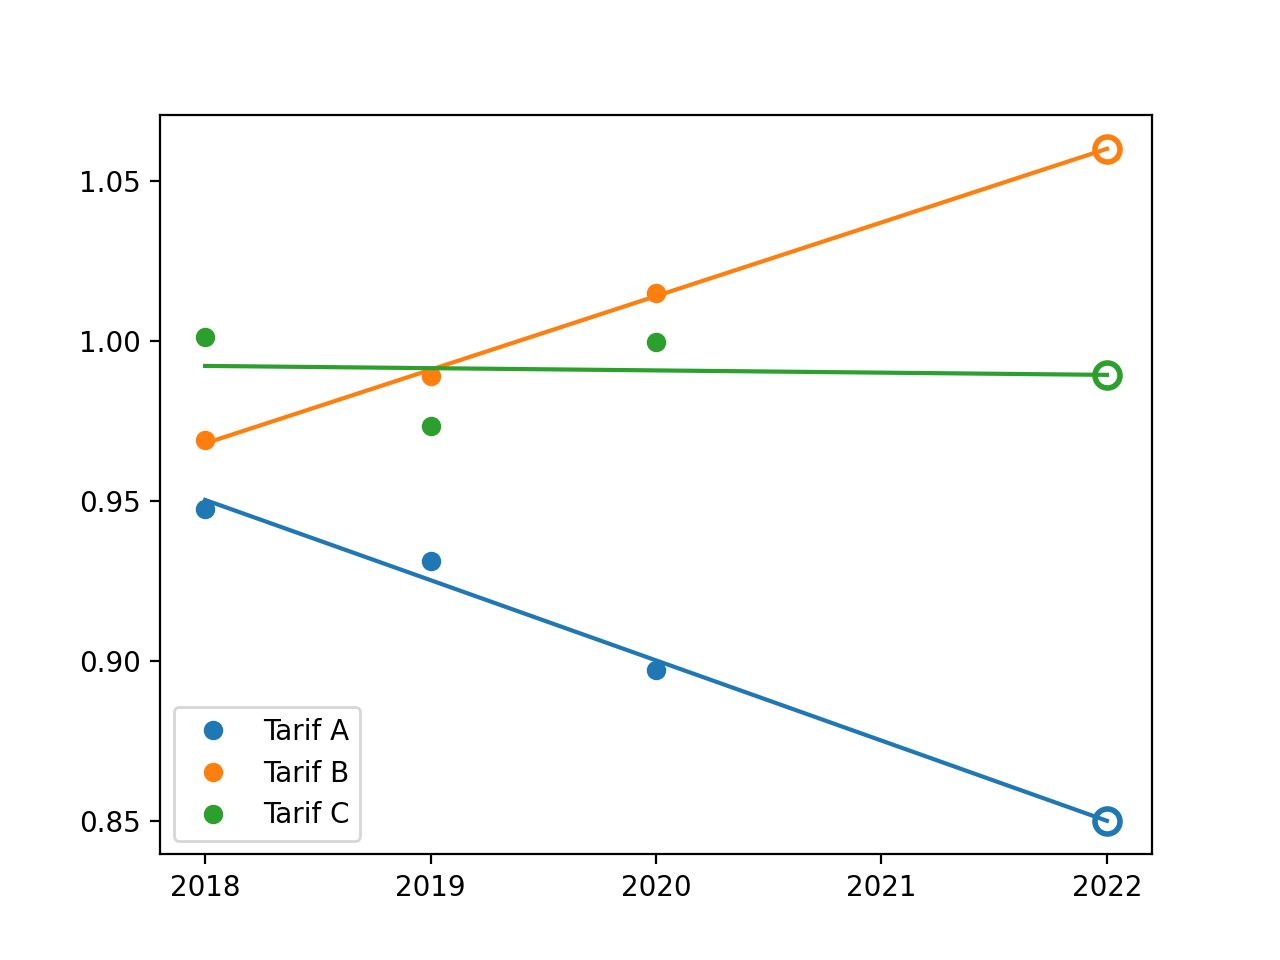

In [17]:
#Plotte lineare Extrapolation der Quoten
%matplotlib notebook
ax4 = plt.subplot(111)

m1, y0_1 = Trendbestimmung_params(Jahre_Quoten,Quoten_Tarif_A)[1:]
m2, y0_2 = Trendbestimmung_params(Jahre_Quoten,Quoten_Tarif_B)[1:]
m3, y0_3 = Trendbestimmung_params(Jahre_Quoten,Quoten_Tarif_C)[1:]

markers1, = ax4.plot(Jahre_Quoten,Quoten_Tarif_A,marker='o',linestyle='none',label="Tarif A")
markers2, = ax4.plot(Jahre_Quoten,Quoten_Tarif_B,marker='o',linestyle='none',label="Tarif B")
markers3, = ax4.plot(Jahre_Quoten,Quoten_Tarif_C,marker='o',linestyle='none',label="Tarif C")

x_line = np.linspace(2018,2022,100)

ax4.plot(x_line,y0_1+m1*x_line,color=markers1.get_color())
ax4.plot(x_line,y0_2+m2*x_line,color=markers2.get_color())
ax4.plot(x_line,y0_3+m3*x_line,color=markers3.get_color())

x_2022 = 2022

ax4.plot(x_2022,y0_1+m1*x_2022,color=markers1.get_color(),marker='o',fillstyle='none',markersize=9,markeredgewidth=2)
ax4.plot(x_2022,y0_2+m2*x_2022,color=markers2.get_color(),marker='o',fillstyle='none',markersize=9,markeredgewidth=2)
ax4.plot(x_2022,y0_3+m3*x_2022,color=markers3.get_color(),marker='o',fillstyle='none',markersize=9,markeredgewidth=2)

ax4.legend(loc="lower left")

ax4.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

*Was bedeutet ein Trend größer oder kleiner 1?*

Der Auslösende Faktor (AF) ist die entscheidende Größe, die bestimmt obein Tarif angepasst werden muss oder nicht. Er ist definiert als

<center>$\boxed{\mathrm{AF}(2022) = \mathrm{Quote}(2020)\cdot \mathrm{Trend}}$.

Wenn der Auslösende Faktor um mehr als 10% vom Wert 1 abweicht, muss der Tarif angepasst werden. Tarif C muss für 2022 schon einmal nicht angepasst werden. Was ist mit den anderen Tarifen? *Benutze die oben berechneten Trends und Quoten des Jahres 2020 um zu bestimmen, welche(r) Tarif in 2022 angepasst werden muss.*

|AF Tarif A|AF Tarif B|AF Tarif C|
|:---:|:---:|:---:|
|?|?|0,9983|

In [18]:
#Tarif A:
AF_A = round(0.9443*0.8972,4)
print("AF Tarif A: ",AF_A)
if abs(AF_A-1)>0.1:
    print("Tarif A muss angepasst werden.\n")
else:
    print("Tarif A muss nicht angepasst werden.\n")

#Tarif B:
AF_B = round(1.0454*1.0149,4)
print("AF Tarif B: ",AF_B)
if abs(AF_B-1)>0.1:
    print("Tarif B muss angepasst werden.\n")
else:
    print("Tarif B muss nicht angepasst werden.\n")
    
#Tarif C:
AF_C = round(0.9986*0.9997,4)
print("AF Tarif C: ",AF_C)
if abs(AF_C-1)>0.1:
    print("Tarif C muss angepasst werden.\n")
else:
    print("Tarif C muss nicht angepasst werden.\n")


AF Tarif A:  0.8472
Tarif A muss angepasst werden.

AF Tarif B:  1.061
Tarif B muss nicht angepasst werden.

AF Tarif C:  0.9983
Tarif C muss nicht angepasst werden.



## Geschafft!

Nun habt ihr die Grundzutaten der Beitragsanpassung kennengelernt. Natürlich gibt es bei der richtigen Anpassung noch einige Schritte mehr, die berücksichtigt werden müssen.
Wir hoffen, dass ihr interessante Einblicke in unsere Arbeit erhalten habt und vielleicht könnt ihr euch ja vorstellen, uns zukünftig als Köche zu unterstützen.
 













---